In [1]:
from Subspace import Subspace
from Inference import Inference 
from model import Model
import matplotlib.pyplot as plt
from autograd import numpy as np



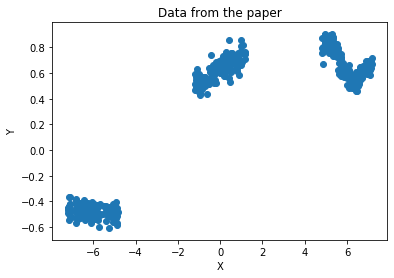

In [2]:
# visualize the data used in original paper
data = np.load('../example/data.npy')
x, y = data[:, 0], data[:, 1]
plt.scatter(x, y)
plt.title('Data from the paper')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
alpha = 1
c = 0
h = lambda x: np.exp(-alpha * (x - c) ** 2)

###neural network model design choices
width = 7
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
                'hidden_layers': hidden_layers,
                'input_dim': input_dim,
                'output_dim': output_dim,
                'activation_fn_type': 'rbf',
                'activation_fn_params': 'c=0, alpha=1',
                'activation_fn': h}

# set random state to make the experiments replicable
rand_state = 127
random = np.random.RandomState(rand_state)

# create a model and train the model
my_nn = Model.create(submodel_type="Feedforward", architecture=architecture)

# use MSE result as params_init
params = {'step_size': 1e-3,
          'max_iteration': 5000,
          'random_restarts': 1}

# fit my neural network to minimize MSE on the given data
my_nn.fit(x_train=x.reshape((1, -1)), y_train=y.reshape((1, -1)), params=params)

Iteration 0 lower bound 289.3001853084916; gradient mag: 990.2060364926602
Iteration 100 lower bound 107.0780461869004; gradient mag: 145.49567971593677
Iteration 200 lower bound 93.3218528910101; gradient mag: 43.398098804648946
Iteration 300 lower bound 87.36705042632238; gradient mag: 50.47577938922759
Iteration 400 lower bound 77.04110606687772; gradient mag: 72.61696586725114
Iteration 500 lower bound 55.11953246275229; gradient mag: 101.66465905368601
Iteration 600 lower bound 21.459547007887842; gradient mag: 101.59721452823686
Iteration 700 lower bound 5.8144928341375355; gradient mag: 35.611762336360506
Iteration 800 lower bound 4.191846344429371; gradient mag: 7.386818658743642
Iteration 900 lower bound 3.919625535317175; gradient mag: 4.610261963649015
Iteration 1000 lower bound 3.7577506249513473; gradient mag: 3.9477122958420194
Iteration 1100 lower bound 3.6264128529472597; gradient mag: 3.548539592941056
Iteration 1200 lower bound 3.5060894882556335; gradient mag: 3.2944

Text(0, 0.5, 'Y')

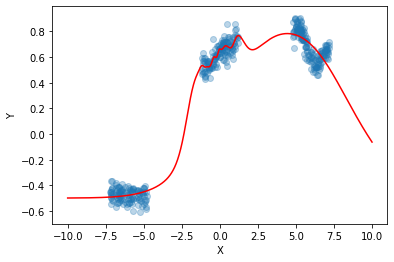

In [4]:
# visualize the model's prediction
x_test = np.linspace(-10, 10, 1000).reshape(1,-1)
y_test = my_nn.forward(x_test, use_subweights = False, weights = my_nn.weights)[0]
plt.scatter(x, y, alpha = 0.3)
plt.plot(x_test[0], y_test[0], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')


In [5]:
# ---------------- Core thing! ------------------ #
# set up model, subspace, inference

my_subspace = Subspace.create(subspace_type="random", model=my_nn, n_subspace=3)
my_subspace.collect_vector(X=x, y=y)
P, w = my_subspace.get_space()
my_inference = Inference.create(inference_type="HMC", model=my_nn, P=P, w_hat=w)
# my_inference = Inference.create(inference_type="BBB", model=my_nn, P=P, w_hat=w)


# get initial weights (in subspace dimension!!)
position_init = my_nn.get_z_from_W(weights=my_nn.weights, P=P, w_hat=w)

# train
# for HMC
my_inference.train(X=x, y=y, warm_start=True, position_init=position_init)
# for BBB
# my_inference.train(X=x, y=y, warm_start=True, init_mean=position_init)

/Users/ZiyiZ/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ZiyiZ/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/ZiyiZ/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
/Users/ZiyiZ/anaconda3/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


AssertionError: 

In [8]:
z_samples

array([[ 5.27172617e+03, -2.55247724e+03],
       [ 7.85134277e+01,  4.00315298e+03],
       [ 2.32157950e+03, -1.48498385e+03],
       [-1.71379019e+02,  1.90169756e+03],
       [ 1.04244968e+03, -8.26601544e+02],
       [-1.70037192e+02,  9.14294155e+02],
       [-2.06308631e+03, -2.34041871e+03],
       [-1.94749797e+03, -2.89614931e+02],
       [ 7.50299516e+05,  3.39498253e+05],
       [ 4.14644543e+05,  3.01007762e+05],
       [ 2.94251072e+05,  1.22998767e+05],
       [ 1.56788502e+05,  1.21926833e+05],
       [ 1.15919988e+05,  4.34099768e+04],
       [ 5.88697390e+04,  4.99616104e+04],
       [ 4.59254234e+04,  1.47005732e+04],
       [ 2.18891030e+04,  2.07490046e+04],
       [ 1.83230058e+04,  4.63544359e+03],
       [ 8.02636167e+03,  8.74823876e+03],
       [ 7.37345555e+03,  1.26441744e+03],
       [ 2.88468246e+03,  3.75017247e+03],
       [ 2.99725557e+03,  2.22432721e+02],
       [ 1.00628939e+03,  1.63663634e+03],
       [ 1.23397379e+03, -4.79251689e+01],
       [ 1.

Text(0, 0.5, 'Y')

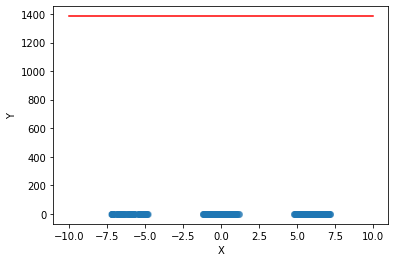

In [12]:
n = 100
z_samples = my_inference.get_posterior(n_samples = 100)
x_test = np.linspace(-10, 10, 1000).reshape(1,-1)
y_test = my_nn.forward(P=P, w_hat=w, z=z_samples[-1], X = x_test)[0]
plt.scatter(x, y, alpha = 0.3)
plt.plot(x_test[0], y_test[0], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')

In [11]:
y_test.shape

(1, 1, 1000)

[ 0.00387721 -0.00174438  0.17640523  0.04001572]
Iteration 0 lower bound -943.9098004093116; gradient mag: 515.2085302434132
[ 0.54710764 -0.36653886 -2.73041826 -3.18870097]
Iteration 200 lower bound -775.4743018275966; gradient mag: 43.86028502745455
[ 0.55682394 -0.35555479 -3.28712542 -3.54177566]
Iteration 400 lower bound -778.4579125109132; gradient mag: 19.15529966330564
[ 0.54731118 -0.36700774 -3.43286884 -3.87303312]
Iteration 600 lower bound -783.1594511505094; gradient mag: 33.68011942690907
[ 0.55679421 -0.3624546  -3.49317436 -3.91809697]
Iteration 800 lower bound -776.71724208354; gradient mag: 27.549842240122263


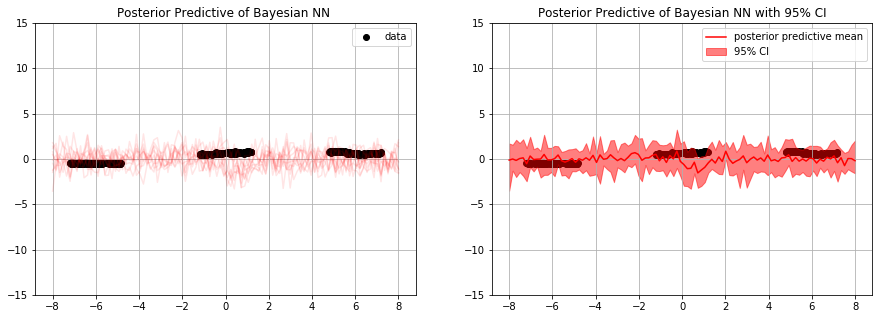

In [52]:


# get posterior z
n_sample = 10
post_sample = my_inference.get_posterior(n_samples=n_sample).reshape(-1, 2)
x_test = np.linspace(-8, 8, 100)
y_test = np.reshape(
    [my_nn.forward(P=P, w_hat=w, z=post_sample[i], X=x_test.reshape(1, -1)) for i in range(n_sample)],
    (n_sample, -1)) \
         + np.random.normal(0, my_nn.Sigma_Y_det ** 0.5, size=(n_sample, len(x_test)))
# because here Sigma_Y is 1-D, so determinants=its value

# plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.title('Posterior Predictive of Bayesian NN ')
plt.ylim(-15, 15)
for i in range(n_sample):
    plt.plot(x_test, y_test[i], color='red', alpha=max(1 / n_sample, 0.1))
plt.scatter(x, y, color='black', label='data')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='black')
plt.plot(x_test, y_test.mean(0), color='red', label='posterior predictive mean')
plt.fill_between(x_test, np.percentile(y_test, 0.25, axis=0), np.percentile(y_test, 97.5, axis=0),
                 color='red', label='95% CI', alpha=0.5)
plt.legend(loc='best')
plt.title('Posterior Predictive of Bayesian NN with 95% CI')
plt.grid()
plt.ylim(-15, 15)
plt.show()